
# Assignment 1.3: Visualizing Distributions
### Part A — Jitter plot

Pick one of your Personal Focus Crimes and a suitable time interval (somewhere between a month and 6 months, depending on how common the crime is). Create a jitter plot of the incident times during a single hour (e.g. 13:00–14:00): let time run along the 
-axis and add vertical jitter.
What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?

Total incidents for Property Crime (June-July 2009): 12351


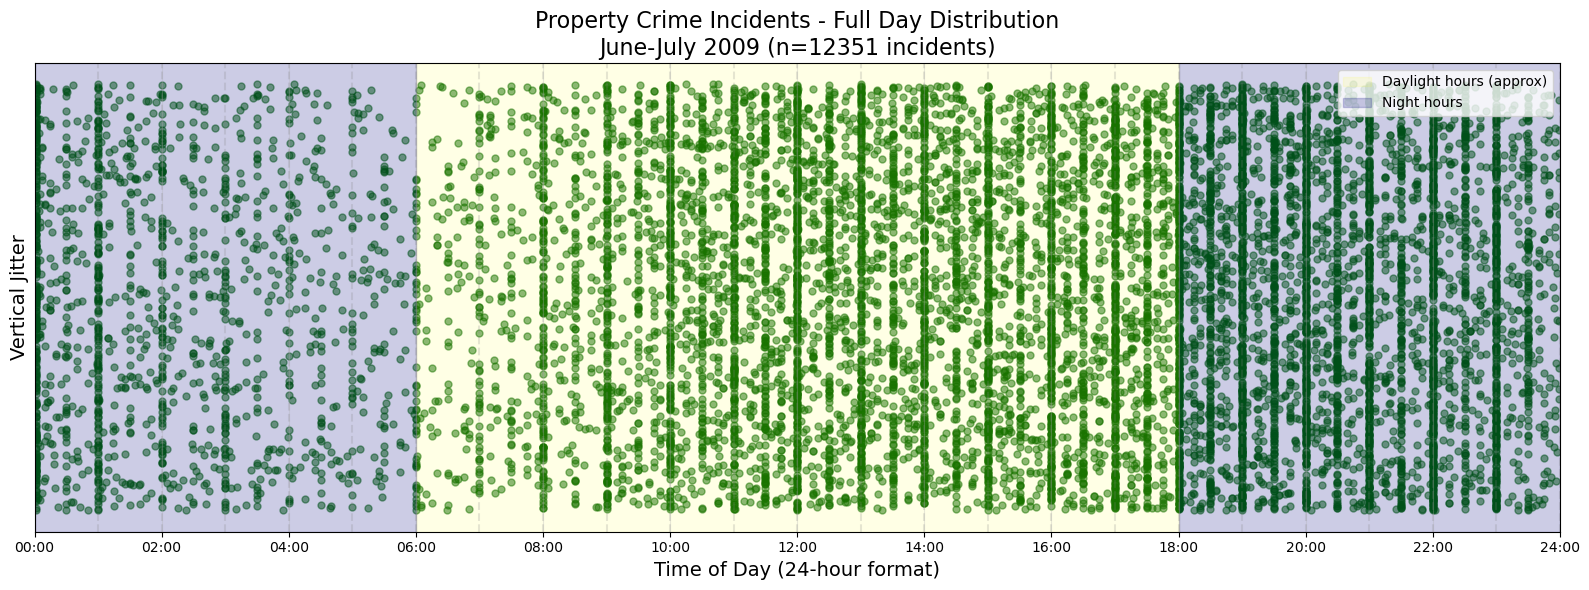


--- Incident Distribution by Time of Day ---
Late Night (00:00-03:59): 1217 incidents (9.9%)
Early Morning (04:00-07:59): 629 incidents (5.1%)
Morning (08:00-11:59): 1939 incidents (15.7%)
Afternoon (12:00-15:59): 2559 incidents (20.7%)
Evening (16:00-19:59): 3159 incidents (25.6%)
Night (20:00-23:59): 2848 incidents (23.1%)

Peak hour: 18:00-19:00 (902 incidents)
Quietest hour: 5:00-6:00 (133 incidents)


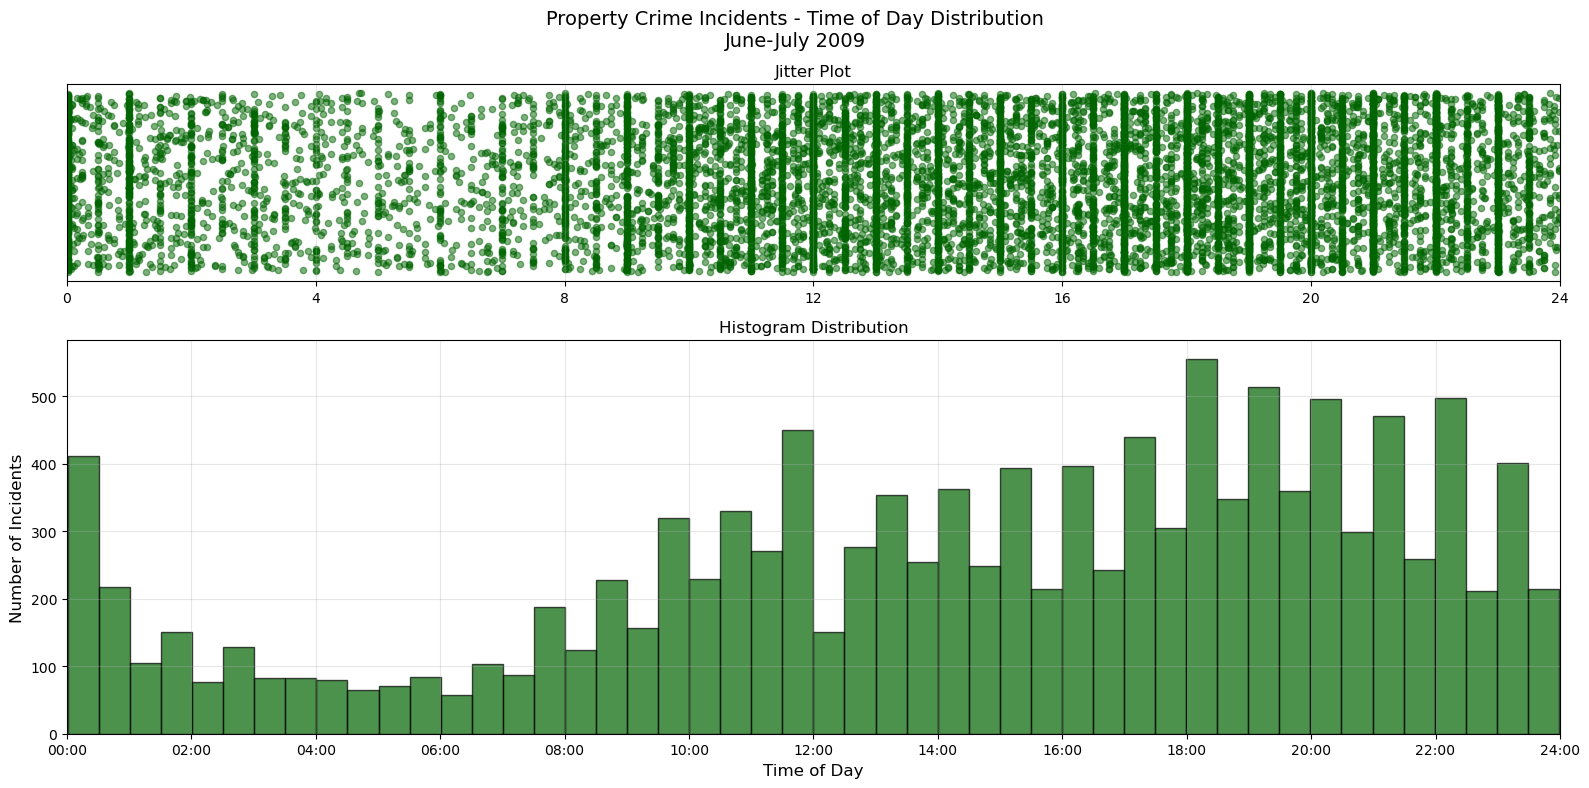

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv("../data/clean-data/sf_clean_data_grouped.csv")

# Convert Incident Datetime to datetime
data['Incident Datetime'] = pd.to_datetime(data['Incident Datetime'])

# Filter
focus_crime = "Property Crime"
period_data = data[
    (data['Focus Group'] == focus_crime) & 
    (data['Incident Datetime'].dt.year == 2017) & 
    (data['Incident Datetime'].dt.month.isin([6, 7]))  
]

print(f"Total incidents for {focus_crime} (June-July 2009): {len(period_data)}")

if len(period_data) == 0:
    print(f"No data found! Available Focus Groups: {data['Focus Group'].unique()}")
else:
    # Extract time of day as fraction of day (0 to 24 hours)
    time_of_day = (
        period_data['Incident Datetime'].dt.hour + 
        period_data['Incident Datetime'].dt.minute / 60 + 
        period_data['Incident Datetime'].dt.second / 3600
    )
    
    # Add vertical jitter
    jitter = np.random.uniform(-0.3, 0.3, size=len(period_data))
    
    # Create the plot
    plt.figure(figsize=(16, 6))
    plt.scatter(time_of_day, jitter, alpha=0.5, s=25, color='darkgreen')
    
    # Customize the plot
    plt.title(f'{focus_crime} Incidents - Full Day Distribution\nJune-July 2017 (n={len(period_data)} incidents)', 
              fontsize=16)
    plt.xlabel('Time of Day (24-hour format)', fontsize=14)
    plt.ylabel('Vertical Jitter', fontsize=14)
    plt.yticks([])  # Remove y-axis ticks
    
    # Format x-axis to show hours
    plt.xticks(np.arange(0, 25, 1),  # Every 2 hours
               [f'{hour:02d}:00' for hour in range(0, 25, 2)])
    
    # Add vertical grid lines at each hour
    for hour in range(0, 25):
        plt.axvline(x=hour, color='gray', linestyle='--', alpha=0.2)
    
    # Add background shading for day/night (rough approximation)
    plt.axvspan(6, 18, alpha=0.1, color='yellow', label='Daylight hours (approx)')
    plt.axvspan(0, 6, alpha=0.2, color='navy', label='Night hours')
    plt.axvspan(18, 24, alpha=0.2, color='navy')
    
    plt.xlim(0, 24)
    plt.grid(True, alpha=0.3, axis='x')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # Statistical summary by time blocks
    print("\n--- Incident Distribution by Time of Day ---")
    
    # Define time blocks
    time_blocks = {
        'Late Night (00:00-03:59)': (0, 4),
        'Early Morning (04:00-07:59)': (4, 8),
        'Morning (08:00-11:59)': (8, 12),
        'Afternoon (12:00-15:59)': (12, 16),
        'Evening (16:00-19:59)': (16, 20),
        'Night (20:00-23:59)': (20, 24)
    }
    
    for block_name, (start, end) in time_blocks.items():
        count = len(period_data[(time_of_day >= start) & (time_of_day < end)])
        percentage = (count / len(period_data)) * 100
        print(f"{block_name}: {count} incidents ({percentage:.1f}%)")
    
    # Find peak hours
    hour_counts = period_data['Incident Datetime'].dt.hour.value_counts().sort_index()
    peak_hour = hour_counts.idxmax()
    peak_count = hour_counts.max()
    
    print(f"\nPeak hour: {peak_hour}:00-{peak_hour+1}:00 ({peak_count} incidents)")
    print(f"Quietest hour: {hour_counts.idxmin()}:00-{hour_counts.idxmin()+1}:00 ({hour_counts.min()} incidents)")
    
    # Optional: Create histogram to show distribution more clearly
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), gridspec_kw={'height_ratios': [1, 2]})
    
    # Top plot: Jitter plot
    ax1.scatter(time_of_day, np.random.uniform(-0.2, 0.2, size=len(period_data)), 
                alpha=0.5, s=20, color='darkgreen')
    ax1.set_title('Jitter Plot', fontsize=12)
    ax1.set_yticks([])
    ax1.set_xlim(0, 24)
    ax1.set_xticks(np.arange(0, 25, 4))
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Bottom plot: Histogram
    ax2.hist(time_of_day, bins=48, alpha=0.7, color='darkgreen', edgecolor='black')
    ax2.set_title('Histogram Distribution', fontsize=12)
    ax2.set_xlabel('Time of Day', fontsize=12)
    ax2.set_ylabel('Number of Incidents', fontsize=12)
    ax2.set_xlim(0, 24)
    ax2.set_xticks(np.arange(0, 25, 2))
    ax2.set_xticklabels([f'{hour:02d}:00' for hour in range(0, 25, 2)])
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle(f'{focus_crime} Incidents - Time of Day Distribution\nJune-July 2017', fontsize=14)
    plt.tight_layout()
    plt.show()

Based on this plot, the most of the Property Crimes in 2017, where their incidence was the highest, cluster around the time window from 18:00 to 19:00. The most busy hours are during daytime, the incidence decreases from midnight until 8:00. The general pattern we can follow is that more cases are registered on hour that can suggest that when manually entering data, police department rounds up to the nearest hour. This can be explained by people reporting do not know the exact time when someone was trespassing, stolen their car or other, therefore providing a time interval.

### Part B — Probability plot

Using the same geographic data from Part B, create a probability plot (QQ plot) for the latitude distribution of each of your two crime types. (scipy.stats.probplot is your friend here.)
What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Where does the distribution deviate from normal, and what does that deviation tell you about the geography of crime in SF?

Property Crime: 1278053 latitude points
Violent Crime: 308461 latitude points


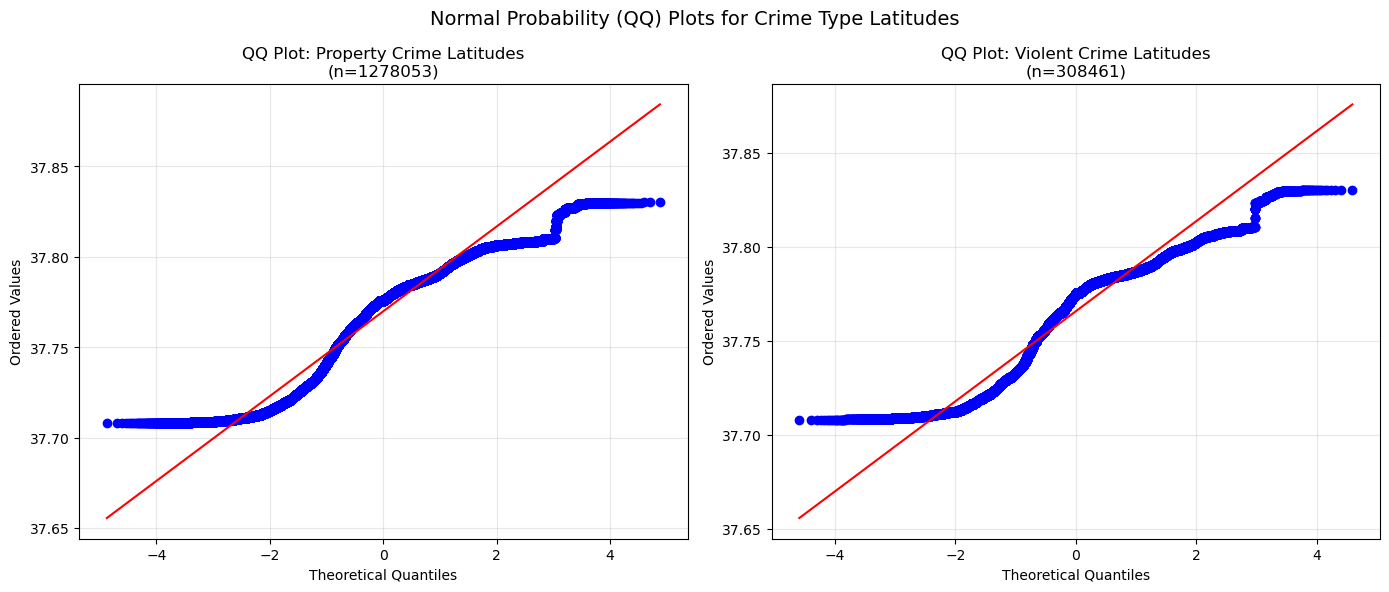

In [26]:
from scipy import stats

# Choose two crime types to compare (replace with your specific types)
crime_type_1 = "Property Crime"
crime_type_2 = "Violent Crime"

data = data[(data['Latitude'] < 90)].copy()

# Filter latitude data for each crime type (remove any null values)
latitudes_1 = data[data['Focus Group'] == crime_type_1]['Latitude'].dropna()
latitudes_2 = data[data['Focus Group'] == crime_type_2]['Latitude'].dropna()

print(f"{crime_type_1}: {len(latitudes_1)} latitude points")
print(f"{crime_type_2}: {len(latitudes_2)} latitude points")

# Create QQ plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# QQ plot for crime type 1
stats.probplot(latitudes_1, dist="norm", plot=axes[0])
axes[0].set_title(f'QQ Plot: {crime_type_1} Latitudes\n(n={len(latitudes_1)})', fontsize=12)
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Ordered Values')
axes[0].grid(True, alpha=0.3)

# QQ plot for crime type 2
stats.probplot(latitudes_2, dist="norm", plot=axes[1])
axes[1].set_title(f'QQ Plot: {crime_type_2} Latitudes\n(n={len(latitudes_2)})', fontsize=12)
axes[1].set_xlabel('Theoretical Quantiles')
axes[1].set_ylabel('Ordered Values')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Normal Probability (QQ) Plots for Crime Type Latitudes', fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
print("Latitude min:", data['Latitude'].min())
print("Latitude max:", data['Latitude'].max())

Latitude min: 37.70784759521
Latitude max: 37.83005523682


Only lattitudes under 90 degrees were kept for this analysis.
We are comparing the rates to the normal distribution. We clearly see, that the crime locations are not randomly distributed by the S shape of the plot, meaning there are areas where Property or Violent Crime occures more often than in others. If the point were exactly on the straight line, theis would mean that the incidence of the crime is the same in all of the neighbourhoods in San Francisco. We have shown on other focus groups in the previous part of the exercise that this is not true.

### Part C — Box plots of time-of-day

For each of your Personal Focus Crimes, extract the time-of-day of every incident.
Create box plots showing the time-of-day distribution for all your Personal Focus Crimes side by side.
What patterns do you see? Are there crimes that happen mostly at night? Mostly during business hours? For crimes that peak late at night, does the box plot handle the wrap-around at midnight well? What goes wrong?
Above, feel free to use alternatives to box plots — violin plots, swarm plots, or raincloud plots — if you think they reveal more. If you do, briefly explain what the alternative shows that the box plot doesn't.

C:\Users\zojap\AppData\Local\Temp\ipykernel_5888\3386150577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Focus Group', y='Time of Day', palette='Set2')


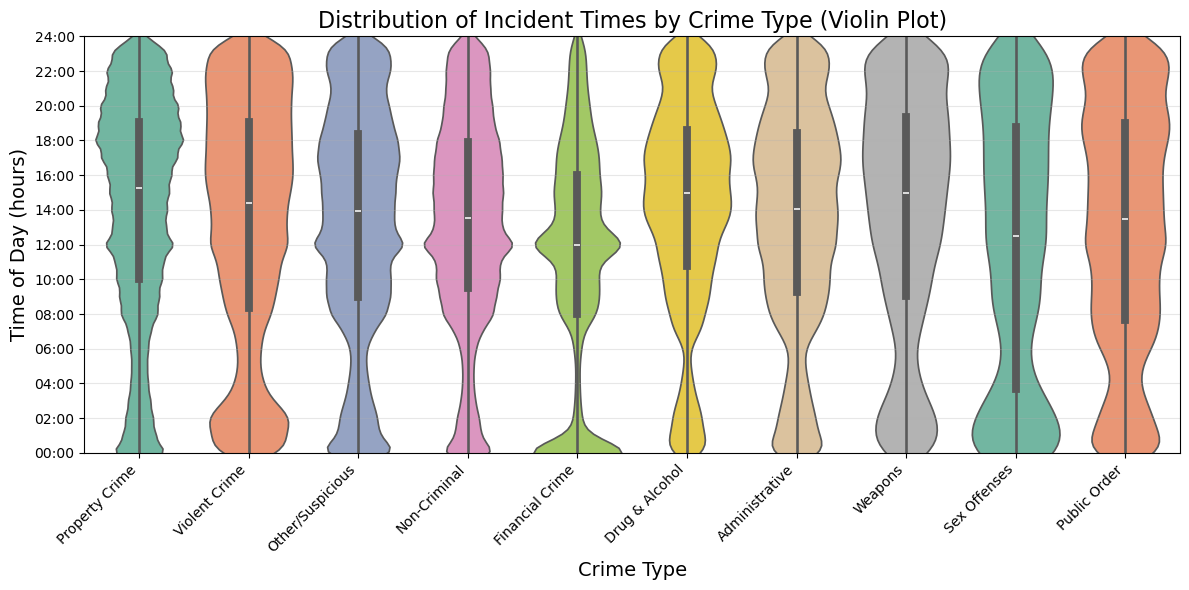

In [43]:
# --- DEFINE YOUR PERSONAL FOCUS CRIMES HERE ---
focus_crimes = data['Focus Group'].unique()   # or specify a list like ['Property Crime', 'Violent Crime']

# Filter to only those crimes
plot_data = data[data['Focus Group'].isin(focus_crimes)].copy()

# Create side‑by‑side violin plots
plt.figure(figsize=(12, 6))  # slightly wider for readability
sns.violinplot(data=plot_data, x='Focus Group', y='Time of Day', palette='Set2')

# Beautify the plot
plt.title('Distribution of Incident Times by Crime Type (Violin Plot)', fontsize=16)
plt.xlabel('Crime Type', fontsize=14)
plt.ylabel('Time of Day (hours)', fontsize=14)

# Format y‑axis labels as clock times
yticks = np.arange(0, 25, 2)
plt.yticks(yticks, [f'{int(h):02d}:00' for h in yticks])
plt.ylim(0, 24)

plt.grid(True, alpha=0.3, axis='y')

# Rotate x‑axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


For this analysis we decided to use violin plots, as these comparing to box plots, reveal more from the data structure, in this case e.g. information about proportion of the incidents happening at a certain hour in relation to other parts of the day.
The plot that most of the crimes are happening from 7:00 to 2:00. We observe peaks around 12:00 for Property and Financial Crime, together with Non-Criminal and Other. For Property Crime the median is around 16:00, the reason can be that businesses are still open, people are away from their homes. Violent crime has a broad distribution during evening hours which can be explained by social life and no daylight. A similar pattern and explanation is observed for the weapons. Non-Criminal and Financial Crime follows daily bussiness hours, and the Group of Other/Suspicious has a bit of a broader pattern, explained by broad reported times of suspicious activity. Sex Offenses and Public Order crimes span a long time during the day, often related to the darkness. 